**PROJECT: PREDIKSI HARGA PROPERTI**

1. Business Understanding (Pemahaman Bisnis)


- Masalah: Perusahaan properti kesulitan menentukan harga jual rumah yang pas. Harga terlalu tinggi tidak laku, terlalu rendah rugi.
- Tujuan: Membuat model Machine Learning sederhana untuk memprediksi harga rumah berdasarkan spesifikasinya.
- Target Pengguna: Tim Sales Properti.
- Pertanyaan Bisnis: Faktor apa (luas tanah, lokasi, kamar) yang paling mempengaruhi harga?

---

2. Data Understanding (Pemahaman Data)
- Di sini kita memuat data mentah dan melihat "kekacauan" apa yang ada di dalamnya.
- dibawah ini Dataset "Kotor" Simulasi. Ini mengandung hampir semua masalah umum yang akan di dunia nyata (Teks tidak konsisten, Tipe data salah, Missing Values/NaN, dan Data Aneh/Outlier).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- SIMULASI DATASET KOTOR ---
data_mentah = {
    'id_rumah': ['H001', 'H002', 'H003', 'H004', 'H005', 'H006', 'H007', 'H008'],
    'lokasi': [
        'Jakarta Selatan',
        'jakarta selatan',  # Masalah 1: Format teks beda
        'Depok',
        'Bogor',
        'Jakarta Selatan',
        'Depok',
        'Jakarta  Timur',    # Masalah 2: Spasi ganda
        'Bogor'
    ],
    'luas_tanah': [
        120,
        150,
        90,
        200,
        120,
        110,
        130,
        'DATA_ERROR'        # Masalah 3: Ada teks di kolom angka
    ],
    'jumlah_kamar': [
        3,
        4,
        2,
        5,
        3,
        np.nan,             # Masalah 4: Data hilang (NaN)
        3,
        4
    ],
    'harga_juta': [
        2500,
        3200,
        900,
        1500,
        2800,
        1100,
        2000,
        1600
    ]
}

df = pd.DataFrame(data_mentah)

print("--- STEP 1: CEK DATA MENTAH ---")
print(df.head(8))


--- STEP 1: CEK DATA MENTAH ---
  id_rumah           lokasi  luas_tanah  jumlah_kamar  harga_juta
0     H001  Jakarta Selatan         120           3.0        2500
1     H002  jakarta selatan         150           4.0        3200
2     H003            Depok          90           2.0         900
3     H004            Bogor         200           5.0        1500
4     H005  Jakarta Selatan         120           3.0        2800
5     H006            Depok         110           NaN        1100
6     H007   Jakarta  Timur         130           3.0        2000
7     H008            Bogor  DATA_ERROR           4.0        1600


In [2]:
df['lokasi'].unique()

array(['Jakarta Selatan', 'jakarta selatan', 'Depok', 'Bogor',
       'Jakarta  Timur'], dtype=object)

----

**Fase Data Understanding**

In [3]:
print("\n--- STEP 2: CEK TIPE DATA (INFO) ---")
print(df.info())


--- STEP 2: CEK TIPE DATA (INFO) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_rumah      8 non-null      object 
 1   lokasi        8 non-null      object 
 2   luas_tanah    8 non-null      object 
 3   jumlah_kamar  7 non-null      float64
 4   harga_juta    8 non-null      int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 452.0+ bytes
None


----

**Data Preparation (Persiapan Data)**

In [4]:
# --- MISI 1: CLEANING TEKS ---
df['lokasi'] = df['lokasi'].str.strip().str.title().str.replace('  ', ' ').astype('category')

print(df['lokasi'].unique())

['Jakarta Selatan', 'Depok', 'Bogor', 'Jakarta Timur']
Categories (4, object): ['Bogor', 'Depok', 'Jakarta Selatan', 'Jakarta Timur']


In [5]:
# --- MISI 2: CLEANING ANGKA ---
df['luas_tanah'] = pd.to_numeric(df['luas_tanah'], errors='coerce')
median_luas = df['luas_tanah'].median()
print(f'Median luas tanah sebelum imputer: {median_luas}')

df['luas_tanah'] = df['luas_tanah'].fillna(median_luas)
print(df['luas_tanah'])

Median luas tanah sebelum imputer: 120.0
0    120.0
1    150.0
2     90.0
3    200.0
4    120.0
5    110.0
6    130.0
7    120.0
Name: luas_tanah, dtype: float64


In [6]:
# --- MISI 3: MENAMBAL NAN (IMPUTATION) ---
median_jumlah_kamar = df['jumlah_kamar'].median()
print(f'Median jumlah kamar sebelum imputer: {median_jumlah_kamar}')

df['jumlah_kamar'] = df['jumlah_kamar'].fillna(median_jumlah_kamar)
print(df['jumlah_kamar'])

Median jumlah kamar sebelum imputer: 3.0
0    3.0
1    4.0
2    2.0
3    5.0
4    3.0
5    3.0
6    3.0
7    4.0
Name: jumlah_kamar, dtype: float64


In [7]:
print(df.head(8))

print(df.info())

  id_rumah           lokasi  luas_tanah  jumlah_kamar  harga_juta
0     H001  Jakarta Selatan       120.0           3.0        2500
1     H002  Jakarta Selatan       150.0           4.0        3200
2     H003            Depok        90.0           2.0         900
3     H004            Bogor       200.0           5.0        1500
4     H005  Jakarta Selatan       120.0           3.0        2800
5     H006            Depok       110.0           3.0        1100
6     H007    Jakarta Timur       130.0           3.0        2000
7     H008            Bogor       120.0           4.0        1600
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id_rumah      8 non-null      object  
 1   lokasi        8 non-null      category
 2   luas_tanah    8 non-null      float64 
 3   jumlah_kamar  8 non-null      float64 
 4   harga_juta    8 non-null      int64  

In [8]:
# --- MISI 4: BUANG KOLOM TIDAK PENTING ---

df_for_modeling = df.copy()

df_for_modeling.drop(columns=['id_rumah'], inplace=True)

print(df_for_modeling.head(8))
print(df_for_modeling.info())

            lokasi  luas_tanah  jumlah_kamar  harga_juta
0  Jakarta Selatan       120.0           3.0        2500
1  Jakarta Selatan       150.0           4.0        3200
2            Depok        90.0           2.0         900
3            Bogor       200.0           5.0        1500
4  Jakarta Selatan       120.0           3.0        2800
5            Depok       110.0           3.0        1100
6    Jakarta Timur       130.0           3.0        2000
7            Bogor       120.0           4.0        1600
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   lokasi        8 non-null      category
 1   luas_tanah    8 non-null      float64 
 2   jumlah_kamar  8 non-null      float64 
 3   harga_juta    8 non-null      int64   
dtypes: category(1), float64(2), int64(1)
memory usage: 536.0 bytes
None


In [9]:
# --- MISI 5: ENCODING (MENGUBAH TEKS JADI ANGKA) ---

# Kita gunakan pd.get_dummies untuk mengubah kolom 'lokasi' jadi angka 0 dan 1
# dtype=int agar hasilnya angka 0/1, bukan True/False
df_final = pd.get_dummies(df_for_modeling, columns=['lokasi'], dtype=int)

print("--- DATA FINAL SIAP MODELING ---")
print(df_final.head(8))
print("\n--- INFO DATA FINAL ---")
print(df_final.info())

--- DATA FINAL SIAP MODELING ---
   luas_tanah  jumlah_kamar  harga_juta  lokasi_Bogor  lokasi_Depok  \
0       120.0           3.0        2500             0             0   
1       150.0           4.0        3200             0             0   
2        90.0           2.0         900             0             1   
3       200.0           5.0        1500             1             0   
4       120.0           3.0        2800             0             0   
5       110.0           3.0        1100             0             1   
6       130.0           3.0        2000             0             0   
7       120.0           4.0        1600             1             0   

   lokasi_Jakarta Selatan  lokasi_Jakarta Timur  
0                       1                     0  
1                       1                     0  
2                       0                     0  
3                       0                     0  
4                       1                     0  
5                       0  

----

**Modeling (Pemodelan)**

In [10]:
from sklearn.linear_model import LinearRegression

# --- MISI 6: SPLIT DATA (X dan y) ---
# X adalah semua data KECUALI harga
X = df_final.drop(columns=['harga_juta'])

# y adalah target harga
y = df_final['harga_juta']

# --- MISI 7: TRAINING MODEL ---
model = LinearRegression()
model.fit(X, y)

print("✅ MODEL BERHASIL DILATIH!")

# Mari kita intip "Rumus Rahasia" yang ditemukan mesin
# Kita gabungkan nama kolom dengan koefisiennya supaya enak dibaca
coef_df = pd.DataFrame({
    'Faktor': X.columns,
    'Pengaruh (Juta)': model.coef_
})

print("\n--- RAHASIA HARGA RUMAH MENURUT MESIN ---")
print(coef_df.sort_values(by='Pengaruh (Juta)', ascending=False))

✅ MODEL BERHASIL DILATIH!

--- RAHASIA HARGA RUMAH MENURUT MESIN ---
                   Faktor  Pengaruh (Juta)
4  lokasi_Jakarta Selatan       987.500000
1            jumlah_kamar       586.792453
5    lokasi_Jakarta Timur       349.764151
0              luas_tanah        -8.018868
3            lokasi_Depok      -597.405660
2            lokasi_Bogor      -739.858491


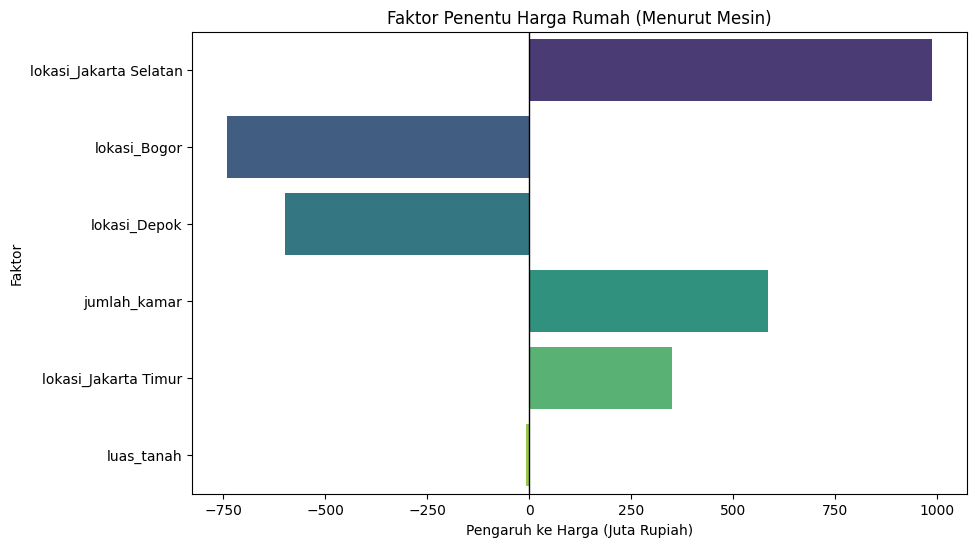

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Urutkan data biar (dari pengaruh terbesar ke terkecil)
# gunakan abs() (absolut) agar minusnya tetap dianggap pengaruh besar
coef_df = coef_df.sort_values(by='Pengaruh (Juta)', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Pengaruh (Juta)', y='Faktor', hue='Faktor', palette='viridis')

plt.title('Faktor Penentu Harga Rumah (Menurut Mesin)')
plt.xlabel('Pengaruh ke Harga (Juta Rupiah)')
plt.ylabel('Faktor')
plt.axvline(0, color='black', linewidth=1) # Garis tengahbatas positif/negatif
plt.show()

----

**Deployment (Penerapan / Prediksi)**

- Skenario: Ada klien mau jual rumah dengan spek:
- Lokasi: Depok
- Luas Tanah: 100 m²
- Kamar: 2

In [ ]:
# --- MISI 8: PREDIKSI HARGA RUMAH BARU ---

# 1. Buat satu baris data kosong, tapi kolomnya "menjiplak" X
# Ini menjamin nama kolom dan urutannya 100% SAMA dengan saat latihan
input_baru = pd.DataFrame(columns=X.columns)
input_baru.loc[0] = 0  # Isi baris pertama dengan angka 0 semua (sebagai default)

# 2. isi data yang kita inginkan (timpa angka 0 tadi)
input_baru['luas_tanah'] = 100
input_baru['jumlah_kamar'] = 2
input_baru['lokasi_Depok'] = 1  # Depok


print("--- DATA INPUT (Sudah Rapih) ---")
print(input_baru)

# 3. Prediksi!
prediksi_harga = model.predict(input_baru)[0]

print(f"\n💰 Prediksi Harga Rumah di Depok (100m, 2 Kamar): Rp {prediksi_harga:.2f} Juta")

--- DATA INPUT (Sudah Rapih) ---
   luas_tanah  jumlah_kamar  lokasi_Bogor  lokasi_Depok  \
0         100            10             0             1   

   lokasi_Jakarta Selatan  lokasi_Jakarta Timur  
0                       0                     0  

💰 Prediksi Harga Rumah di Depok (100m, 2 Kamar): Rp 5400.94 Juta
